In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/Salary_Data (1).csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#EDA

In [5]:
data['YearsExperience']=pd.to_numeric(data['YearsExperience'],errors = 'coerce')
data['Salary']=pd.to_numeric(data['Salary'],errors = 'coerce')

In [6]:
data.duplicated()
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [7]:
years=data.iloc[:,0]
salary=data.iloc[:,1]

In [8]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7831cd3c4130>,
 'caps': [<matplotlib.lines.Line2D at 0x7831cd3c4670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7831cd57be50>],
 'medians': [<matplotlib.lines.Line2D at 0x7831cd3c4bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7831cd3c4e50>],
 'means': []}

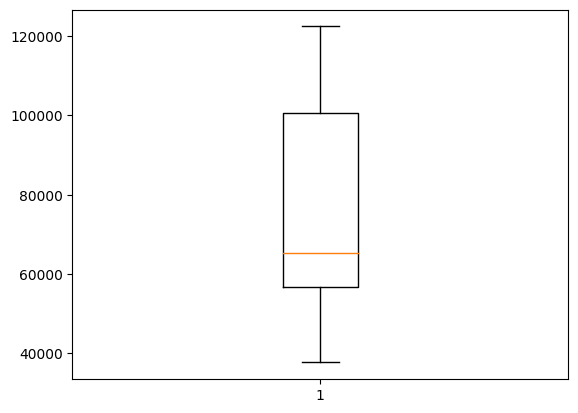

In [9]:
plt.boxplot(salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x7831cd497a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7831cd497e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7831cd497760>],
 'medians': [<matplotlib.lines.Line2D at 0x7831cb2cc3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7831cb2cc640>],
 'means': []}

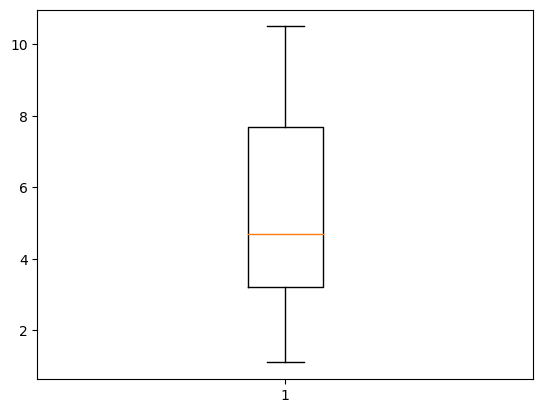

In [10]:
plt.boxplot(years)

In [11]:
#no outliers

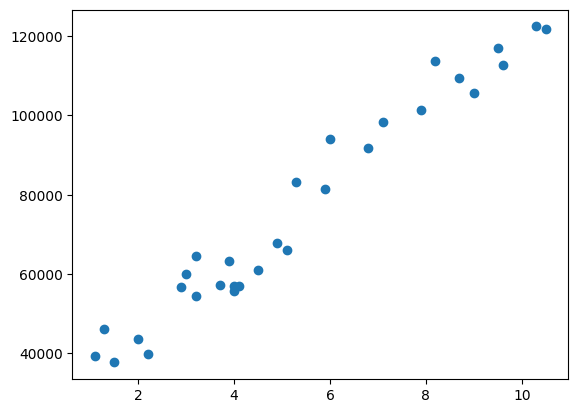

In [12]:
plt.scatter(years,salary)

In [13]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
import statsmodels.formula.api as smf

In [15]:
model = smf.ols("salary~years", data=data).fit()

In [16]:
import seaborn as sms

<Axes: xlabel='Salary', ylabel='YearsExperience'>

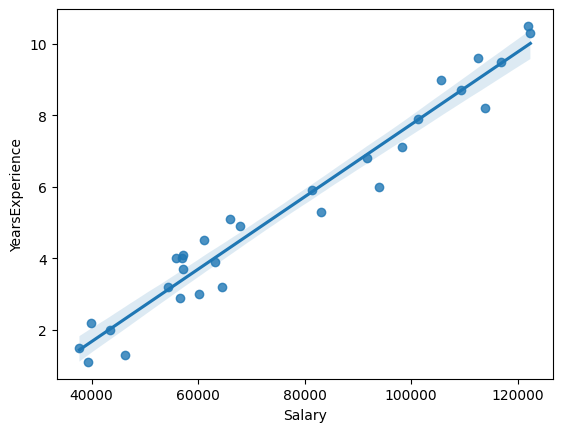

In [18]:
sms.regplot(x=salary, y=years, data=data)

In [19]:
model.rsquared

0.9569566641435086

In [20]:
#prediction
new=pd.Series([6,9])
newdf=pd.DataFrame(new,columns=['years'])

In [21]:
model.predict(newdf)

0     82491.974127
1    110841.861092
dtype: float64

In [23]:
import numpy as np

transformations = {
    'Original': lambda x: x,
    'Log': np.log,
    'Sqrt': np.sqrt,
    'Square': lambda x: x ** 2
}

In [24]:
results = pd.DataFrame(columns=['Transformation', 'R-squared', 'Intercept', 'Coefficient'])


In [26]:
for transformation, func in transformations.items():
    X_transformed = func(data['YearsExperience'])
    model = smf.ols(f"Salary ~ X_transformed", data=data).fit()

    # Store the results
    results = results.append({
        'Transformation': transformation,
        'R-squared': model.rsquared,
        'Intercept': model.params[0],
        'Coefficient': model.params[1]
    }, ignore_index=True)

<ipython-input-26-1762de9c7deb>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-26-1762de9c7deb>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-26-1762de9c7deb>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-26-1762de9c7deb>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


In [27]:
print(results)

  Transformation  R-squared     Intercept   Coefficient
0       Original   0.956957  25792.200199   9449.962321
1            Log   0.853889  14927.971770  40581.987960
2           Sqrt   0.931001 -16055.769117  41500.680583
3         Square   0.915320  48042.585515    776.318773


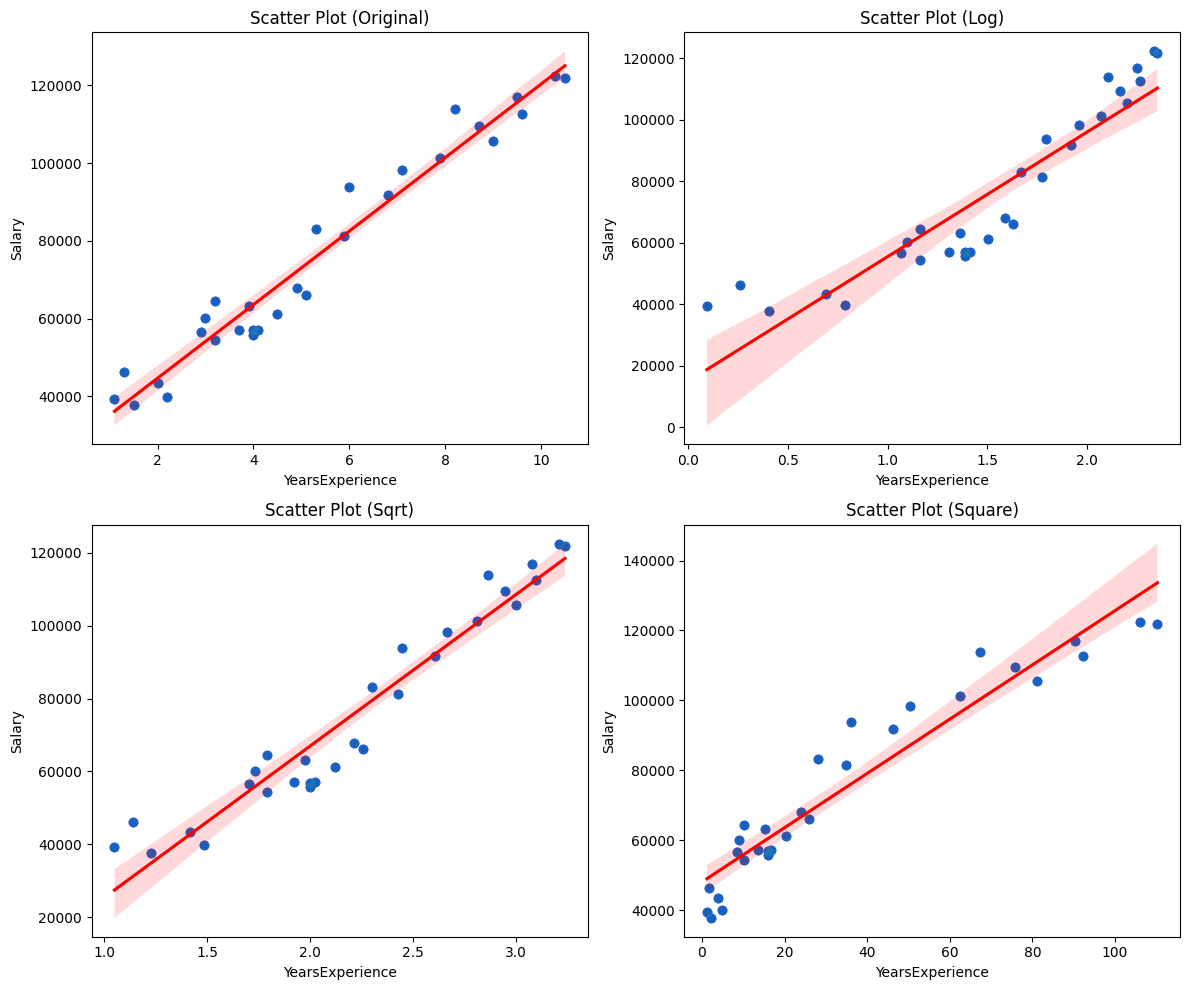

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, (transformation, func) in enumerate(transformations.items()):
    X_transformed = func(data['YearsExperience'])

    # Scatter plot
    ax = axes[i // 2, i % 2]
    ax.scatter(X_transformed, data['Salary'], color='blue')
    ax.set_title(f'Scatter Plot ({transformation})')
    ax.set_xlabel('Transformed YearsExperience')
    ax.set_ylabel('Salary')

    # Regression line
    sns.regplot(x=X_transformed, y=data['Salary'], ax=ax, line_kws={"color": "red"})

plt.tight_layout()
plt.show()